In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import matplotlib.pyplot as plt
from random import shuffle
from random import choice
import time

%matplotlib inline

In [2]:
iris = load_iris()
print(iris.data.shape)
# separate the data from the target attributes
X = iris.data
y = iris.target
# normalize the data attributes
normalized_X = preprocessing.normalize(X)
#plt.plot(normalized_X)

(150, 4)


In [3]:
normalized_X

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [4]:
avg = np.average(normalized_X)
avg

0.4381073768145745

In [5]:
np.sum(np.sum(normalized_X, axis=1)/4)/len(normalized_X)

0.4381073768145745

In [6]:
normalized_X.sum()/(len(normalized_X)*4)

0.4381073768145745

In [7]:
def showimg(nod):
    a = []
    b = []
    c = []
    d = []
    for x in range(0, nb_row):
        for y in range(0, nb_column):
            a.append(nod[x][y][2])
            b.append(nod[x][y][0])
            c.append(nod[x][y][3])
            d.append(nod[x][y][1])
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    img = ax.scatter(a, b, c, c=d, cmap=plt.hot())
    fig.colorbar(img)
    plt.show()

In [8]:
def show_map(m, itera):
    fig = plt.figure(figsize=(6,10))
    plt.imshow(m.sum(axis=2))
    plt.title(itera)
    plt.show()

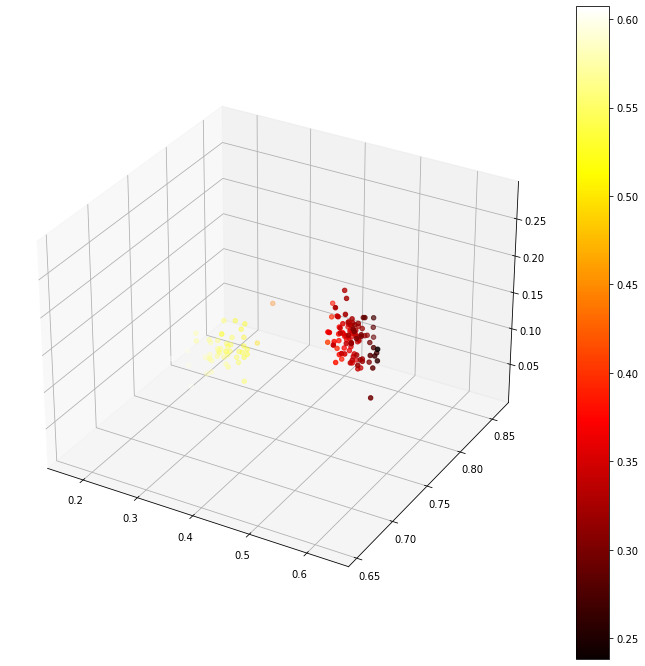

In [9]:
a = []
b = []
c = []
d = []
for x in range(0, len(normalized_X)):
    a.append(normalized_X[x][2])
    b.append(normalized_X[x][0])
    c.append(normalized_X[x][3])
    d.append(normalized_X[x][1])
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(a, b, c, c=d, cmap=plt.hot())
fig.colorbar(img)
#ax.view_init(elev=10., azim=45)
plt.show()

In [10]:
shuffle(normalized_X)

In [11]:
nb_node = 60
nb_row = 6
nb_column = 10
nb_iter = 2000

In [12]:
#np.random.random((6,10,4))
nodes = np.random.uniform(low=avg-0.002, high=avg+0.005, size=(nb_row,nb_column,4))

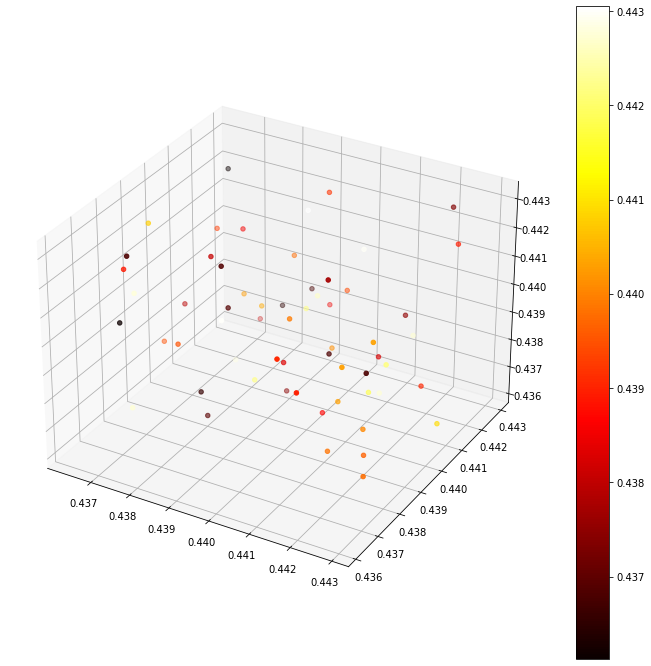

In [13]:
showimg(nodes)

In [14]:
def find_bmu(vec, node):
    bmu_idx = np.array([0, 0])
    min_dist = np.iinfo(int).max
    bmus = []
    for x in range(nb_row):
        for y in range(nb_column):
            w = node[x][y]
            sq_dist = np.sum((w - vec) ** 2)
            sq_dist = np.sqrt(sq_dist)
            if sq_dist < min_dist:
                min_dist = sq_dist # dist
                bmu_idx = np.array([x, y]) # id
                bmus = []
                bmus.append(bmu_idx)
            elif sq_dist == min_dist:
                bmu_idx = np.array([x, y]) # id
                bmus.append(bmu_idx)
    bmu_idx = choice(bmus)
    bmu = node[bmu_idx[0], bmu_idx[1], :]
    return (bmu, bmu_idx)

In [15]:
def alterW(Xi, Wij, itr):
    if itr <= 60000:
        alpha = 0.7
    else:
        alpha = 0.07
    alpha = alpha * (1 - itr/nb_iter)
    return Wij + alpha * (Xi - Wij)

In [16]:
def is_alter(bmu_pos, xNode_pos, dist):
    return np.all(np.sqrt((bmu_pos - xNode_pos)**2) <= dist)

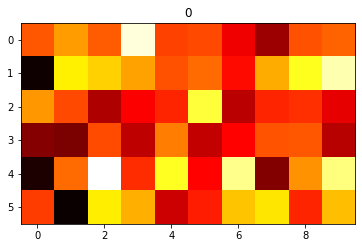

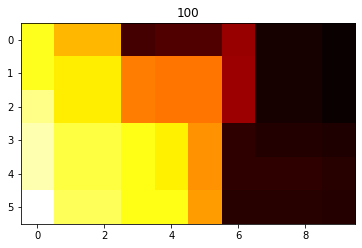

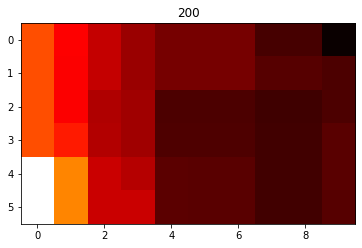

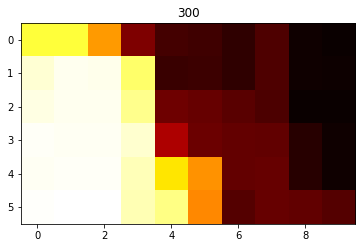

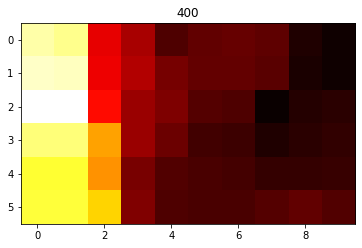

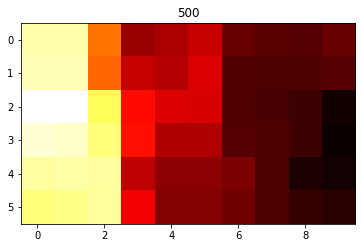

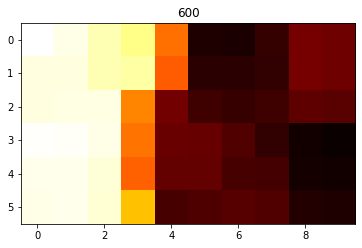

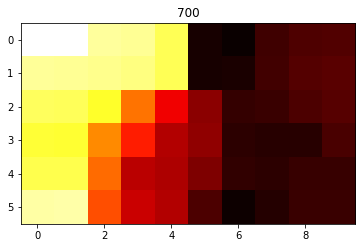

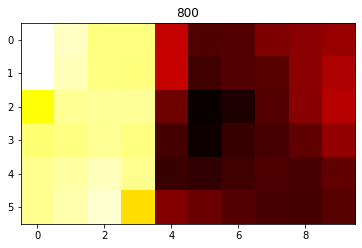

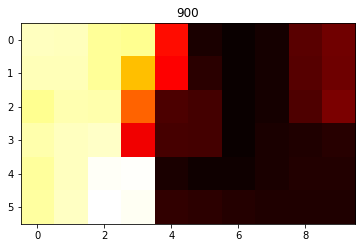

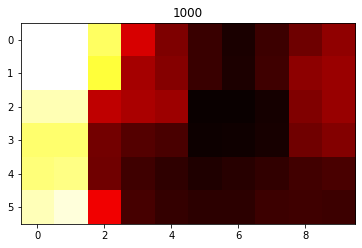

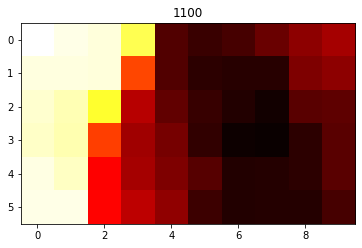

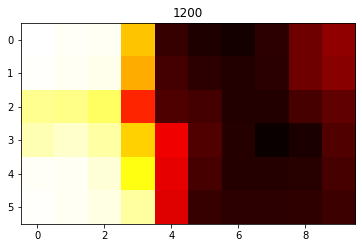

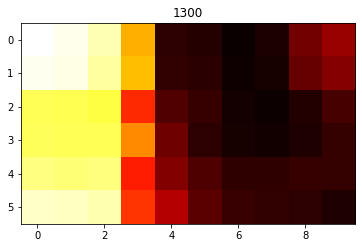

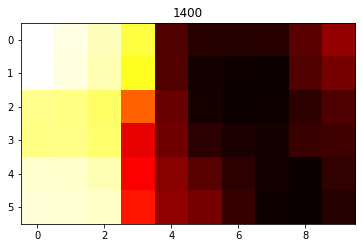

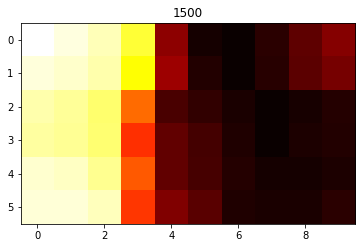

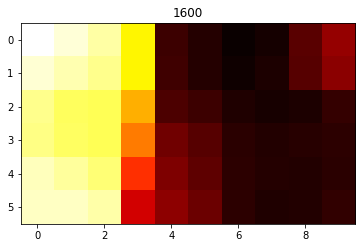

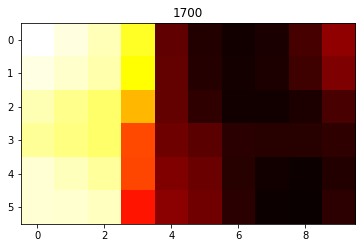

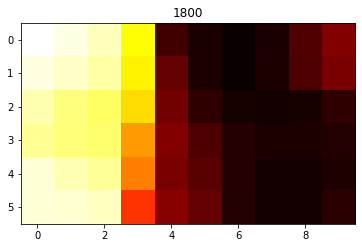

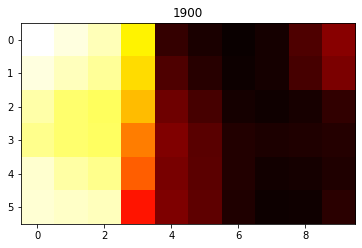

In [17]:
for it in range(0, nb_iter):
    Xi = normalized_X[it%150]
    bmu = find_bmu(Xi, nodes)
    #print(bmu)
    if (it % 100) == 0:
        show_map(nodes, it)
    #nodes[bmu[1][0]][bmu[1][1]] = alterW(Xi, bmu[0], it)
    for x in range(nb_row):
        for y in range(nb_column):
            if it <= 400:
                nb_nhd = round(3-it/(400/3))
                if nb_nhd == 0:
                    nb_nhd = 1
                if is_alter(bmu[1], np.array([x, y]), nb_nhd):
                    nodes[x][y] = alterW(Xi, nodes[x][y], it)
            else:
                if is_alter(bmu[1], np.array([x, y]), 1):
                    nodes[x][y] = alterW(Xi, nodes[x][y], it)

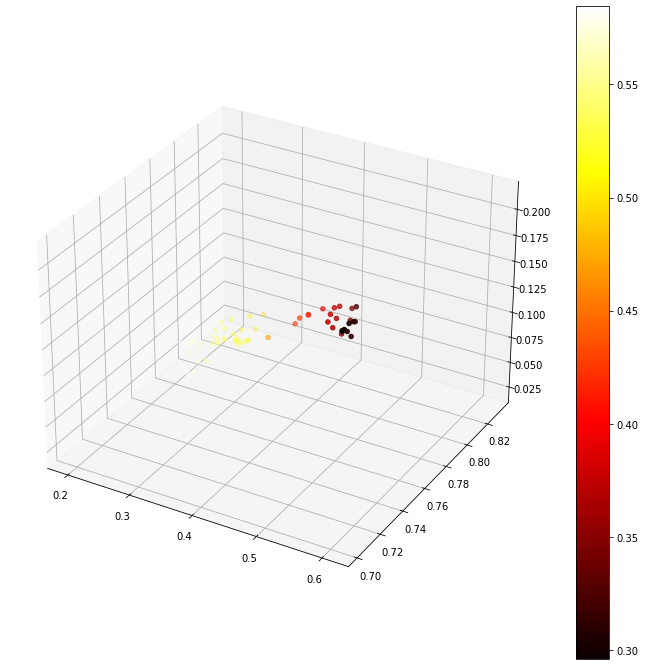

In [18]:
showimg(nodes)

In [19]:
data = iris.data
lable = iris.target

In [20]:
data = preprocessing.normalize(data)

In [21]:
node_label = np.zeros([nb_row,nb_column])

In [22]:
node_label = node_label -1 

In [23]:
for i in range(0, len(lable)):
    bmu = find_bmu(data[i], nodes)
    print(bmu, lable[i])
    node_label[bmu[1][0]][bmu[1][1]] = np.array([lable[i]])

(array([0.80163718, 0.55418041, 0.22083181, 0.03280291]), array([2, 6])) 0
(array([0.82632192, 0.50724797, 0.23884499, 0.03985437]), array([4, 9])) 0
(array([0.8051927 , 0.54830739, 0.22300026, 0.03470883]), array([3, 7])) 0
(array([0.80119212, 0.53558069, 0.26192097, 0.0437869 ]), array([4, 4])) 0
(array([0.78689162, 0.57242146, 0.22652737, 0.02970163]), array([1, 5])) 0
(array([0.78100715, 0.57400036, 0.23961536, 0.05256049]), array([0, 9])) 0
(array([0.78100715, 0.57400036, 0.23961536, 0.05256049]), array([0, 9])) 0
(array([0.80159945, 0.54367266, 0.24408636, 0.04144044]), array([3, 5])) 0
(array([0.80596388, 0.5313271 , 0.25662316, 0.03920394]), array([4, 5])) 0
(array([0.82004804, 0.51552649, 0.24721526, 0.02289913]), array([5, 7])) 0
(array([0.80163718, 0.55418041, 0.22083181, 0.03280291]), array([2, 6])) 0
(array([0.78388069, 0.56276695, 0.24559233, 0.03758739]), array([1, 4])) 0
(array([0.82004804, 0.51552649, 0.24721526, 0.02289913]), array([5, 7])) 0
(array([0.80163718, 0.554

In [24]:
node_label

array([[ 2.,  1.,  1., -1.,  0.,  0.,  0.,  0., -1.,  0.],
       [ 2.,  1.,  1., -1.,  0.,  0., -1.,  0., -1.,  0.],
       [ 1.,  1.,  1.,  1.,  0.,  0.,  0., -1.,  0., -1.],
       [ 2.,  1.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  2.,  2., -1.,  0.,  0.,  0., -1., -1.,  0.],
       [ 2.,  2.,  2., -1.,  0.,  0.,  0.,  0., -1.,  0.]])

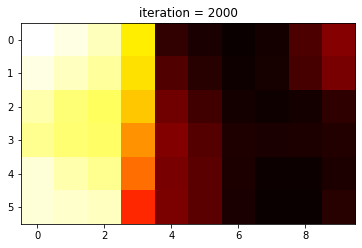

In [25]:
show_map(nodes, f"iteration = {nb_iter}")